# Presidential Twitter Behavior

This project was for my class at UC Berkeley called *Data 100 (Principles and Techniques of Data Science)*. **I worked with Twitter data to analyze Donald Trump's tweets using sentiment analysis.**

This frequent, unfiltered, and direct tweets can potentially provide interesting insight in the effect and influence of social media in the political and/or economicworld.

In [86]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

## Importing the Data

In [87]:
my_zip = zipfile.ZipFile('data/hw4-realdonaldtrump_tweets.json.zip', 'r')
with my_zip.open('hw4-realdonaldtrump_tweets.json', 'r') as f:
    all_tweets = json.load(f)

I constructed a DataFrame called `trump` containing data from all the tweets stored in `all_tweets`. The index of the DataFrame is the ID of each tweet and in ascending order. The columns are:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet. 

In [88]:
ids = [i.get('id') for i in all_tweets]

source = [s.get('source') for s in all_tweets]

text = [t.get('text') for t in all_tweets]
full_text = [t.get('full_text') for t in all_tweets]

time = [t.get('created_at') for t in all_tweets]
time = pd.to_datetime(time)

retweet_count = [c.get('retweet_count') for c in all_tweets]

d = {
    'time': time,
     'source': source,
    'text': text,
     'full_text': full_text,
     'retweet_count': retweet_count
    }

trump = pd.DataFrame(d, index = ids)
trump['text'].fillna(value=trump['full_text'], inplace=True)
trump = trump.drop('full_text', 1)
trump.sort_index(ascending=True).head()

,time,source,text,retweet_count
690171032150237184,2016-01-21 13:56:11+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","""@bigop1: @realDonaldTrump @SarahPalinUSA https://t.co/3kYQGqeVyD""",1059
690171403388104704,2016-01-21 13:57:39+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","""@AmericanAsPie: @glennbeck @SarahPalinUSA Remember when Glenn gave out gifts to ILLEGAL ALIENS at crossing the border? Me too!""",1339
690173226341691392,2016-01-21 14:04:54+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",So sad that @CNN and many others refused to show the massive crowd at the arena yesterday in Oklahoma. Dishonest reporting!,2006
690176882055114758,2016-01-21 14:19:26+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","Sad sack @JebBush has just done another ad on me, with special interest money, saying I won't beat Hillary - I WILL. But he can't beat me.",2266
690180284189310976,2016-01-21 14:32:57+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Low energy candidate @JebBush has wasted $80 million on his failed presidential campaign. Millions spent on me. He should go home and relax!,2886


## Source Analysis

My goal is to find the charateristics of Trump tweets and the devices used for the tweets. 

We see that sources like "Twitter for Android" or "Instagram" are surrounded by HTML tags. I cleaned up the `source` field by removing the HTML tags from each `source` entry.


In [89]:
trump['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M5)</a>',
       '<a href="https://ads.twitter.com" rel="nofollow">Twitter Ads</a>',
       '<a href="https://periscope.tv" rel="nofollow">Periscope</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>'],
      dtype=object)

In [90]:
trump = trump.replace(['<[^>]+>'], [''], regex=True)
trump['source'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web Client',
       'Media Studio', 'Twitter for iPad', 'Instagram', 'Mobile Web (M5)',
       'Twitter Ads', 'Periscope', 'Twitter Media Studio'], dtype=object)

In the following plot, we see that there are two device types that are more commonly used than others.

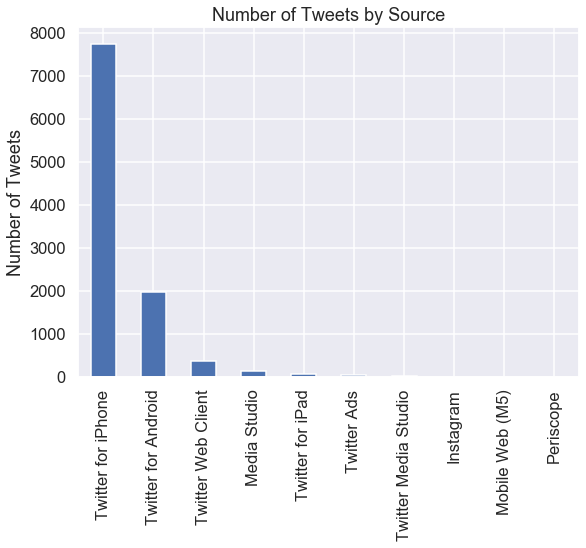

In [91]:
plt.figure(figsize=(8, 6))
trump['source'].value_counts().plot(kind="bar")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets by Source");

Let's now look at which device Trump has used over the entire time period of this dataset.

To examine the distribution of dates I converted the date to a fractional year that can be plotted as a distribution.

In [92]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

trump['year'] = trump['time'].apply(year_fraction)
trump.head()

,time,source,text,retweet_count,year
786204978629185536,2016-10-12 14:00:48+00:00,Twitter for iPhone,PAY TO PLAY POLITICS. \n#CrookedHillary https://t.co/wjsl8ITVvk,24915,2016.778689
786201435486781440,2016-10-12 13:46:43+00:00,Twitter for iPhone,Very little pick-up by the dishonest media of incredible information provided by WikiLeaks. So dishonest! Rigged system!,22609,2016.778689
786189446274248704,2016-10-12 12:59:05+00:00,Twitter for Android,Crooked Hillary Clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,18329,2016.778689
786054986534969344,2016-10-12 04:04:47+00:00,Twitter for iPhone,Thank you Florida- a MOVEMENT that has never been seen before and will never be seen again. Lets get out &amp;… https://t.co/t9XM9wFDZI,18789,2016.778689
786007502639038464,2016-10-12 00:56:06+00:00,Twitter for iPhone,"Join me Thursday in Florida &amp; Ohio!\nWest Palm Beach, FL at noon:\nhttps://t.co/jwbZnQhxg9\nCincinnati, OH this 7:30pm:\nhttps://t.co/5w2UhalPIx",7761,2016.778689


I then used `sns.distplot` to overlay the distributions of Trump's 2 most frequently used web technologies over the years.

Text(0.5, 0, 'year')

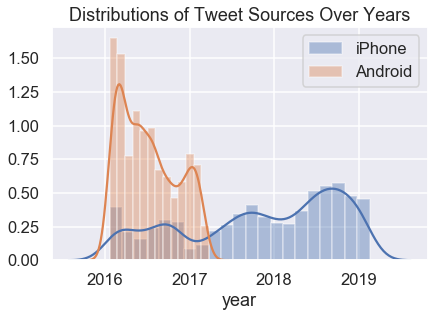

In [93]:
years = trump[['source', 'year']].set_index('source')
android = years.loc[years.index == 'Twitter for Android']
iphone = years.loc[years.index == 'Twitter for iPhone']

sns.distplot(iphone['year'], label ='iPhone')
sns.distplot(android['year'], label ='Android')

plt.legend()
plt.title('Distributions of Tweet Sources Over Years')
plt.xlabel('year')

Is there a difference between Trump's tweet behavior across these devices? 

First, we look at whether Trump's tweets from an Android device come at different times than his tweets from an iPhone. Twitter gives us his tweets in UTC Timezone, so I converted the times to Us Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [94]:
trump['est_time'] = (
    trump['time'].dt.tz_convert("UTC") # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
trump.head()

,time,source,text,retweet_count,year,est_time
786204978629185536,2016-10-12 14:00:48+00:00,Twitter for iPhone,PAY TO PLAY POLITICS. \n#CrookedHillary https://t.co/wjsl8ITVvk,24915,2016.778689,2016-10-12 09:00:48-05:00
786201435486781440,2016-10-12 13:46:43+00:00,Twitter for iPhone,Very little pick-up by the dishonest media of incredible information provided by WikiLeaks. So dishonest! Rigged system!,22609,2016.778689,2016-10-12 08:46:43-05:00
786189446274248704,2016-10-12 12:59:05+00:00,Twitter for Android,Crooked Hillary Clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,18329,2016.778689,2016-10-12 07:59:05-05:00
786054986534969344,2016-10-12 04:04:47+00:00,Twitter for iPhone,Thank you Florida- a MOVEMENT that has never been seen before and will never be seen again. Lets get out &amp;… https://t.co/t9XM9wFDZI,18789,2016.778689,2016-10-11 23:04:47-05:00
786007502639038464,2016-10-12 00:56:06+00:00,Twitter for iPhone,"Join me Thursday in Florida &amp; Ohio!\nWest Palm Beach, FL at noon:\nhttps://t.co/jwbZnQhxg9\nCincinnati, OH this 7:30pm:\nhttps://t.co/5w2UhalPIx",7761,2016.778689,2016-10-11 19:56:06-05:00


I also added a column called `hour` to the `trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$


In [95]:
trump['hour'] = trump['est_time'].dt.hour + trump['est_time'].dt.minute/60 + trump['est_time'].dt.second/60**2
trump.head()

,time,source,text,retweet_count,year,est_time,hour
786204978629185536,2016-10-12 14:00:48+00:00,Twitter for iPhone,PAY TO PLAY POLITICS. \n#CrookedHillary https://t.co/wjsl8ITVvk,24915,2016.778689,2016-10-12 09:00:48-05:00,9.013333
786201435486781440,2016-10-12 13:46:43+00:00,Twitter for iPhone,Very little pick-up by the dishonest media of incredible information provided by WikiLeaks. So dishonest! Rigged system!,22609,2016.778689,2016-10-12 08:46:43-05:00,8.778611
786189446274248704,2016-10-12 12:59:05+00:00,Twitter for Android,Crooked Hillary Clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,18329,2016.778689,2016-10-12 07:59:05-05:00,7.984722
786054986534969344,2016-10-12 04:04:47+00:00,Twitter for iPhone,Thank you Florida- a MOVEMENT that has never been seen before and will never be seen again. Lets get out &amp;… https://t.co/t9XM9wFDZI,18789,2016.778689,2016-10-11 23:04:47-05:00,23.079722
786007502639038464,2016-10-12 00:56:06+00:00,Twitter for iPhone,"Join me Thursday in Florida &amp; Ohio!\nWest Palm Beach, FL at noon:\nhttps://t.co/jwbZnQhxg9\nCincinnati, OH this 7:30pm:\nhttps://t.co/5w2UhalPIx",7761,2016.778689,2016-10-11 19:56:06-05:00,19.935000


Use this time data along with the seaborn `distplot` function, I examined the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.

Text(0, 0.5, 'fraction')

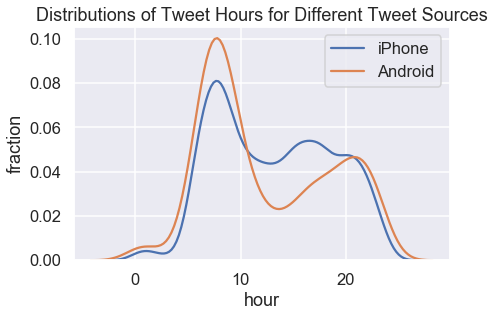

In [96]:
hours = trump[['source', 'hour']].set_index('source')
android = hours.loc[hours.index == 'Twitter for Android']
iphone = hours.loc[hours.index == 'Twitter for iPhone']

sns.distplot(iphone['hour'], label ='iPhone', hist = False)
sns.distplot(android['hour'], label ='Android', hist = False)

plt.legend()
plt.title('Distributions of Tweet Hours for Different Tweet Sources')
plt.xlabel('hour')
plt.ylabel('fraction')

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Let's see if this information significantly changes our plot. 

Text(0, 0.5, 'fraction')

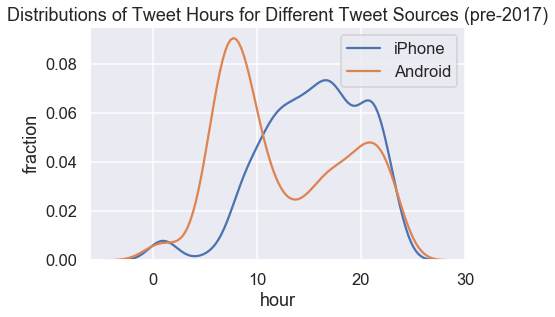

In [97]:
before2017 = trump[trump['year'] < 2017]
hours = before2017[['source', 'hour']].set_index('source')
android = hours.loc[hours.index == 'Twitter for Android']
iphone = hours.loc[hours.index == 'Twitter for iPhone']

sns.distplot(iphone['hour'], label ='iPhone', hist = False)
sns.distplot(android['hour'], label ='Android', hist = False)

plt.legend()
plt.title('Distributions of Tweet Hours for Different Tweet Sources (pre-2017)')
plt.xlabel('hour')
plt.ylabel('fraction')

During the campaign, it was theorized that Donald Trump's tweets from Android devices were written by him personally, and the tweets from iPhones were from his staff.

This figure supports this theory. In the first graph the Tweeting times between iPhone and Android generally followed the same shape and pattern, yet in the second graph the Tweeting times for Android is still similar as the first graph but the Tweeting times for iPhone changes drastically. Because the Android Tweeting times are similar to the general trend, it would make sense that Trump's Android tweets were by him personally and that the iPhone tweets were by his staff. It also makes sense that he would use his staff to write tweets as he became busier when he was elected President.


## Sentiment Analysis

I used the **[VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment)** lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

An **advantage** is it a useful standardized tool to quantify and add context to Trump's tweets so we can potentially find interesting patterns/trends.

A **disadvantage** is that is a biased program because it was created by humans who naturally have biased thinking. Since it does not "read" sentences and relationships between words, VADER cannot perfectly quantity and measure sentiment in Trump's tweets.

i used this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

Let's lowercase the text in the tweets (since the lexicon is also lowercase), get rid of punctuation (since it will cause us to fail to match words), and convert tweets into a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) (to make the sentiments easier to calculate).


In [98]:
sent = pd.read_csv('vader_lexicon.txt', sep="\t", index_col=0, header = None, usecols=[0,1], names=['lexicon', 'polarity'])

trump['text']= trump['text'].str.lower() #lowercase

punct_re = r'[^\w\s]'
trump['no_punc'] = trump['text'].str.replace(punct_re, ' ') #get rid of punctuation

tidy_format = trump['no_punc'].str.split(expand=True).stack().reset_index(level=1) #tidy format
tidy_format.columns = ['num', 'word'] 
tidy_format.head()

,num,word
786204978629185536,0,pay
786204978629185536,1,to
786204978629185536,2,play
786204978629185536,3,politics
786204978629185536,4,crookedhillary


We can now join the table with the lexicon table.

In [99]:
a = tidy_format.merge(sent, how = 'left', left_on="word", right_index = True).reset_index()
a = a.groupby('index').sum()
trump['polarity'] = a[['polarity']]
trump = trump.fillna(0)
trump.head()

,time,source,text,retweet_count,year,est_time,hour,no_punc,polarity
786204978629185536,2016-10-12 14:00:48+00:00,Twitter for iPhone,pay to play politics. \n#crookedhillary https://t.co/wjsl8itvvk,24915,2016.778689,2016-10-12 09:00:48-05:00,9.013333,pay to play politics \n crookedhillary https t co wjsl8itvvk,1.0
786201435486781440,2016-10-12 13:46:43+00:00,Twitter for iPhone,very little pick-up by the dishonest media of incredible information provided by wikileaks. so dishonest! rigged system!,22609,2016.778689,2016-10-12 08:46:43-05:00,8.778611,very little pick up by the dishonest media of incredible information provided by wikileaks so dishonest rigged system,-6.9
786189446274248704,2016-10-12 12:59:05+00:00,Twitter for Android,crooked hillary clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,18329,2016.778689,2016-10-12 07:59:05-05:00,7.984722,crooked hillary clinton likes to talk about the things she will do but she has been there for 30 years why didn t she do them,1.8
786054986534969344,2016-10-12 04:04:47+00:00,Twitter for iPhone,thank you florida- a movement that has never been seen before and will never be seen again. lets get out &amp;… https://t.co/t9xm9wfdzi,18789,2016.778689,2016-10-11 23:04:47-05:00,23.079722,thank you florida a movement that has never been seen before and will never be seen again lets get out amp https t co t9xm9wfdzi,1.5
786007502639038464,2016-10-12 00:56:06+00:00,Twitter for iPhone,"join me thursday in florida &amp; ohio!\nwest palm beach, fl at noon:\nhttps://t.co/jwbznqhxg9\ncincinnati, oh this 7:30pm:\nhttps://t.co/5w2uhalpix",7761,2016.778689,2016-10-11 19:56:06-05:00,19.935000,join me thursday in florida amp ohio \nwest palm beach fl at noon \nhttps t co jwbznqhxg9\ncincinnati oh this 7 30pm \nhttps t co 5w2uhalpix,1.2


Now we have a measure of the sentiment of each of his tweets! We can see the most positive and most negative tweets from Trump in your dataset:

In [100]:
print('Most negative tweets:')
for t in trump.sort_values('polarity').head()['text']:
    print('\n  ', t)

Most negative tweets:

   the trump portrait of an unsustainable border crisis is dead on. “in the last two years, ice officers made 266,000 arrests of aliens with criminal records, including those charged or convicted of 100,000 assaults, 30,000 sex crimes &amp; 4000 violent killings.” america’s southern....

   it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!

   the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!

   ...this evil anti-semitic attack is an assault on humanity. it will take all of us working together to extract the poison of an

In [101]:
print('Most positive tweets:')
for t in trump.sort_values('polarity', ascending=False).head()['text']:
    print('\n  ', t)

Most positive tweets:

   congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!

   congratulations to a truly great football team, the clemson tigers, on an incredible win last night against a powerful alabama team. a big win also for the great state of south carolina. look forward to seeing the team, and their brilliant coach, for the second time at the w.h.

   my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!

   thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new

Here is a single plot showing both the distribution of tweet sentiments for tweets containing `nytimes`, as well as the distribution of tweet sentiments for tweets containing `fox`.

Since the estimated median of the "fox" graph has a higher polarity than the estimated median of the "nyt", we observe that Trump generally had more positives things to tweet about Fox than New York Times. Another interesting aspect is that the "fox" graph has a much higher density of tweets that have a polarity of 0 and 2-3 than the "nyt" graph.

The keywords "liberal" and "conservative" also create interesting plots, since the "conservative" plot is skewed left and the "liberal" plot is more normal around a polarity of 0.

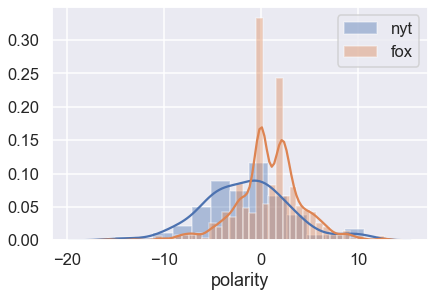

In [102]:
sns.distplot(trump[trump['no_punc'].str.lower().str.contains('nyt')]['polarity'], label = 'nyt')
sns.distplot(trump[trump['no_punc'].str.lower().str.contains('fox')]['polarity'], label = 'fox')
plt.legend()

Now, let's see whether there's a difference in sentiment for tweets with hashtags and those without. 

The 'hashtag or link' plot has a very narrow distribution and high density centered around a polarity of 0 while the 'no hashtag or link' plot has a wide distribution and low density also centered around a polarity of 0. This suggests that Trump's tweets with hashtags or links tend to be neither positive nor negative.

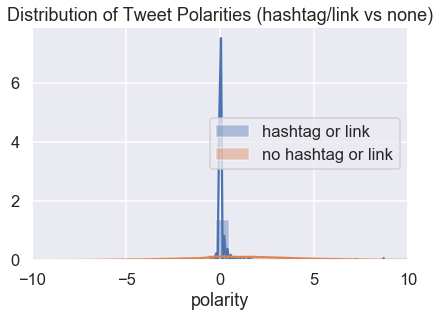

In [103]:
rt_re = r'[^\w]*\brt\b[^\w]*'
hash_link_re = r'(#\w|http)'

sns.distplot(trump[trump['text'].str.match(hash_link_re)]['polarity'],label='hashtag or link');
sns.distplot(trump[~trump['text'].str.match(hash_link_re)]['polarity'],label='no hashtag or link');
plt.xlim(-10, 10);
plt.title('Distribution of Tweet Polarities (hashtag/link vs none)');
plt.legend();